<center>
    <h1>
        <strong>Principal Component Analysis (PCA)</strong>
    </h1>
</center>

This kernel is about **Principle Component Analysis(PCA)** using Logistic Regression Algorithm. PCA is a **Dimensionality Reduction Technique**. 

### **Curse of Dimensionality**

**What is Dimensionality?**

- Dimensions = Features or variables in your dataset.

- As you add more features (dimensions), you're essentially placing your data in a higher-dimensional space.

**What happens in high dimensions?**

- The volume of the space increases exponentially with each added dimension.

    For example, think of how a line (1D) becomes a square (2D), then a cube (3D), and so on...

- In high dimensions, points become farther apart, and data becomes sparse.

- This sparsity makes it hard to find meaningful patterns or clusters in the data.

### **Principle Component Analysis**


<p>
Principal Component Analysis (PCA) is a dimensionality reduction technique that works by identifying new directions (called principal components) along which the data varies the most. These new directions are chosen to maximize the spread (variance) of the data, allowing us to reduce the number of features while preserving as much of the original information as possible. Variance refers to how much the data points spread out from the mean — the greater the spread, the more information (or structure) PCA tries to capture.

</p>

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")





## **About Dataset**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.


Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

### Importing the Dataset

In [75]:
df = pd.read_csv("adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


### Exploratory Data Analysis

In [76]:
#shape of the dataset
df.shape

(32561, 15)

In [77]:
#summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [78]:
#Checking which columns have '?' in them instead of actual data.

for c in df.columns:
    print(f"No. of '?' in column {c} : {df[df[c] == '?'].shape[0]}")

No. of '?' in column age : 0
No. of '?' in column workclass : 1836
No. of '?' in column fnlwgt : 0
No. of '?' in column education : 0
No. of '?' in column education.num : 0
No. of '?' in column marital.status : 0
No. of '?' in column occupation : 1843
No. of '?' in column relationship : 0
No. of '?' in column race : 0
No. of '?' in column sex : 0
No. of '?' in column capital.gain : 0
No. of '?' in column capital.loss : 0
No. of '?' in column hours.per.week : 0
No. of '?' in column native.country : 583
No. of '?' in column income : 0


In [79]:
#Replacing question marks with Nan for later imputation
df[df ==  '?'] = np.nan

In [80]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [89]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now, columns workclass, occupation and native.country have missig values. Imputing them using mode strategy since acll are categorical features.

In [87]:
col = ["workclass", "occupation", "native.country"]
for c in col:
    df[c] = df[c].fillna(df[c].mode()[0])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [90]:
#checking for missing values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [92]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Setting Features vector and target variable

- Target is to determine whether the income of an individual is >=50K or <=50K based on the various features in the dataset then afterwards using PCA keeping only the features that will capture 90%+ of the dataset's variance

In [93]:
X = df.drop(['income'], axis = 1)
y = df['income']

In [94]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


### Splitting the dataset into training and testing sets.


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

## Feature Engineering

### Encoding Categorical Variables

In [121]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Extracting columns with non-numerical datatype
le = LabelEncoder()
lst = [c for c in X_train.columns if df[c].dtype == "object"]
for col in lst:
      X_train[col] = le.fit_transform(X_train[col])
      X_test[col] = le.fit_transform(X_test[col])

In [122]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
15282,41,3,208330,15,10,2,11,0,4,1,0,0,51,38
24870,25,1,191921,9,13,4,2,3,4,1,0,0,25,38
18822,25,3,180212,11,9,4,0,4,2,0,0,0,40,38
26404,53,3,123092,11,9,6,6,1,4,0,0,0,40,38
7842,24,3,122272,9,13,4,4,3,4,0,0,0,40,38


## Feature Scaling

In [123]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.177807,-0.086682,0.173244,1.218035,-0.036491,-0.407250,1.229093,-0.898177,0.394225,0.698654,-0.144749,-0.21852,0.851632,0.262277
1,-0.993245,-1.885092,0.018238,-0.336949,1.130745,0.924081,-1.037414,0.971835,0.394225,0.698654,-0.144749,-0.21852,-1.254868,0.262277
2,-0.993245,-0.086682,-0.092370,0.181379,-0.425570,0.924081,-1.541082,1.595172,-1.947837,-1.431324,-0.144749,-0.21852,-0.039580,0.262277
3,1.056095,-0.086682,-0.631948,0.181379,-0.425570,2.255412,-0.030077,-0.274840,0.394225,-1.431324,-0.144749,-0.21852,-0.039580,0.262277
4,-1.066435,-0.086682,-0.639694,-0.336949,1.130745,0.924081,-0.533746,0.971835,0.394225,-1.431324,-0.144749,-0.21852,-0.039580,0.262277


## Logistic Regression

- First with all 14 features

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf.classes_)


### Confusion matrix


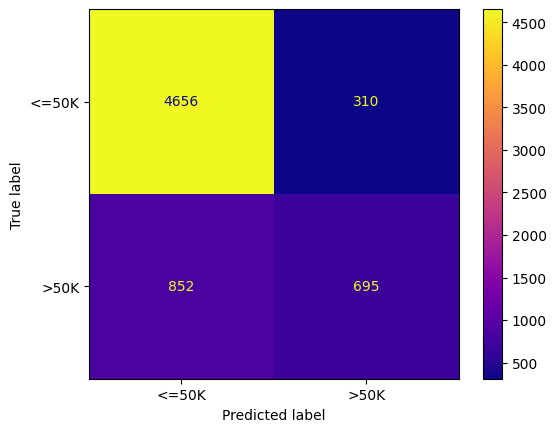

In [136]:
#Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="plasma")
plt.show()


In [141]:
#Accuracy Score and classification_report
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy Score  {acc} \n \n", cr)


Accuracy Score  0.8215875940426839 
 
               precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4966
        >50K       0.69      0.45      0.54      1547

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513



The Accuracy comes out to be <span style="color: red"><strong>82.15 %</strong></span> with **14** features.

## Principle Component Analysis (PCA)

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [152]:
np.mean(X_train)

np.float64(-3.857917846187803e-18)

In [153]:
np.std(X_train)

age               1.0
workclass         1.0
fnlwgt            1.0
education         1.0
education.num     1.0
marital.status    1.0
occupation        1.0
relationship      1.0
race              1.0
sex               1.0
capital.gain      1.0
capital.loss      1.0
hours.per.week    1.0
native.country    1.0
dtype: float64

In [199]:
from sklearn.decomposition import PCA
c = 14
pca = PCA(n_components=c)
pca_income = pca.fit_transform(X_train)
Variance_ratio = pca.explained_variance_ratio_
D = {
    "Principle_component": [f"pc_{i}" for i in range(c)],
    "Weight": [Variance_ratio[i] * 100 for i in range(c)]
}
    
Vr_df = pd.DataFrame(data = D)
Vr_df

,Principle_component,Weight
0,pc_0,14.803823
1,pc_1,10.143074
2,pc_2,8.107741
3,pc_3,7.859831
4,pc_4,7.441793
5,pc_5,7.317622
6,pc_6,7.015236
7,pc_7,6.757149
8,pc_8,6.476383
9,pc_9,6.127895


From the above table it is clear that to preserve at least 90% of the original variance of the data we need to keep at the least 12 principle components. We can drop pc_11, pc_12. Hereby reducing the dimension of our data from 14 to 12. 

In [275]:
pca_income = PCA(n_components=11)
X_train_pca = pca_income.fit_transform(X_train)
X_test_pca = pca_income.fit_transform(X_test)

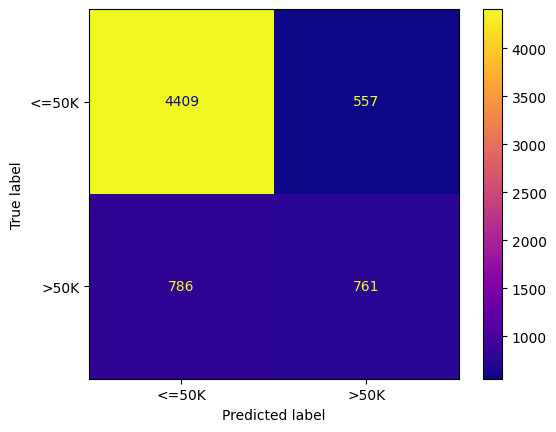

In [278]:
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf.classes_)
#Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="plasma")
plt.show()

In [280]:
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Accuracy Score  {acc} \n \n", cr)

Accuracy Score  0.7937970213419315 
 
               precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      4966
        >50K       0.58      0.49      0.53      1547

    accuracy                           0.79      6513
   macro avg       0.71      0.69      0.70      6513
weighted avg       0.78      0.79      0.79      6513



Almost similar accuracy is achieved with 11 principal components. 

## Plot explained variance ratio with number of dimensions

- An alternative option is to plot the explained variance as a function of the number of dimensions 
- In the plot, we should look for an elbow where the explainded variance stops growing fast
- This can be thought of as the intrinsic dimensionality 
- Now, I will plot cumulative explained variance ratio with number of components to show how variance ratio varies with number of components.

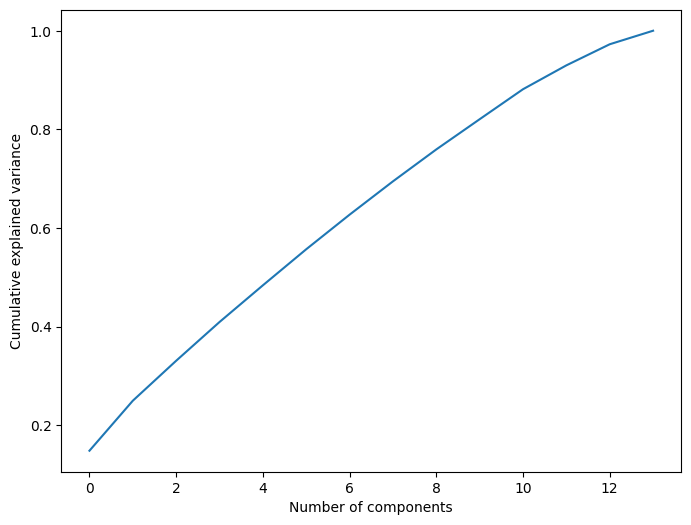

In [282]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()